In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult_income.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

<ipython-input-9-401a950f4a4a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins=(90-17+1)//2)


<Axes: xlabel='age', ylabel='Density'>

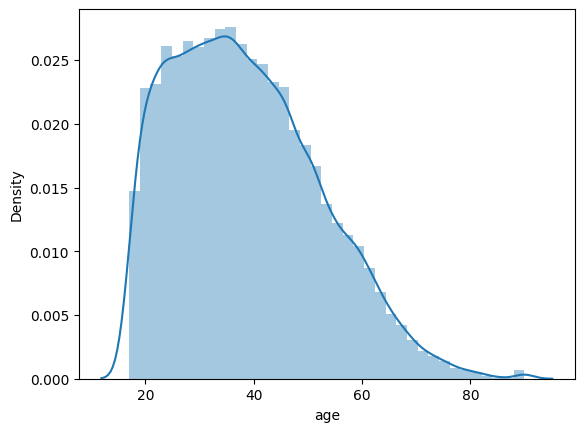

In [9]:
sns.distplot(df['age'], bins=(90-17+1)//2)

In [11]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [13]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [19]:
df[df['workclass'] == '?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [16]:
(df['capital-gain'] == 0).sum(), (df['capital-loss'] == 0).sum()

(29849, 31042)

In [20]:
workclass_missing = df['workclass'] == '?'
occupation_missing = df['occupation'] == '?'

both = (workclass_missing & occupation_missing).sum()
only_wc = (workclass_missing & (~occupation_missing)).sum()
only_oc = (~workclass_missing & occupation_missing).sum()
none = ((~workclass_missing) & (~occupation_missing)).sum()

both, only_wc, only_oc, none

(1836, 0, 7, 30718)

In [23]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [24]:
df['y'] = df['income'].map({'>50K': 1, '<=50K': 0})

In [26]:
df.groupby('occupation')['y'].mean()

occupation
?                    0.103635
Adm-clerical         0.134483
Armed-Forces         0.111111
Craft-repair         0.226641
Exec-managerial      0.484014
Farming-fishing      0.115694
Handlers-cleaners    0.062774
Machine-op-inspct    0.124875
Other-service        0.041578
Priv-house-serv      0.006711
Prof-specialty       0.449034
Protective-serv      0.325116
Sales                0.269315
Tech-support         0.304957
Transport-moving     0.200376
Name: y, dtype: float64

In [29]:
len(df)

32561

In [30]:
df = df.applymap(lambda x: np.nan if x == '?' else x).dropna()

In [31]:
len(df)

30162

In [32]:
df.groupby('sex')['y'].mean()

sex
Female    0.113678
Male      0.313837
Name: y, dtype: float64

In [35]:
df.groupby('workclass')['y'].mean()

workclass
Federal-gov         0.387063
Local-gov           0.294630
Private             0.218792
Self-emp-inc        0.558659
Self-emp-not-inc    0.285714
State-gov           0.268960
Without-pay         0.000000
Name: y, dtype: float64

<Axes: xlabel='workclass', ylabel='y'>

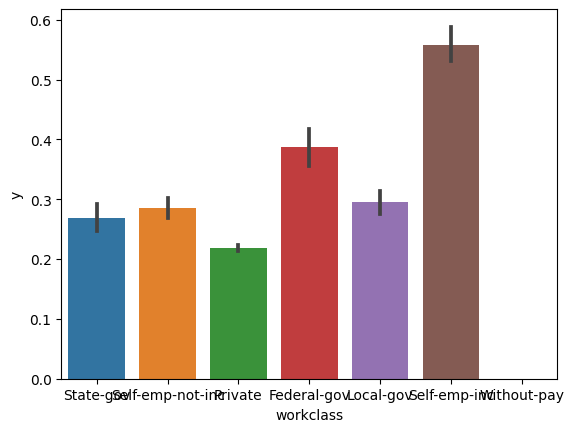

In [36]:
sns.barplot(x='workclass', y='y', data=df)

<Axes: xlabel='workclass', ylabel='y'>

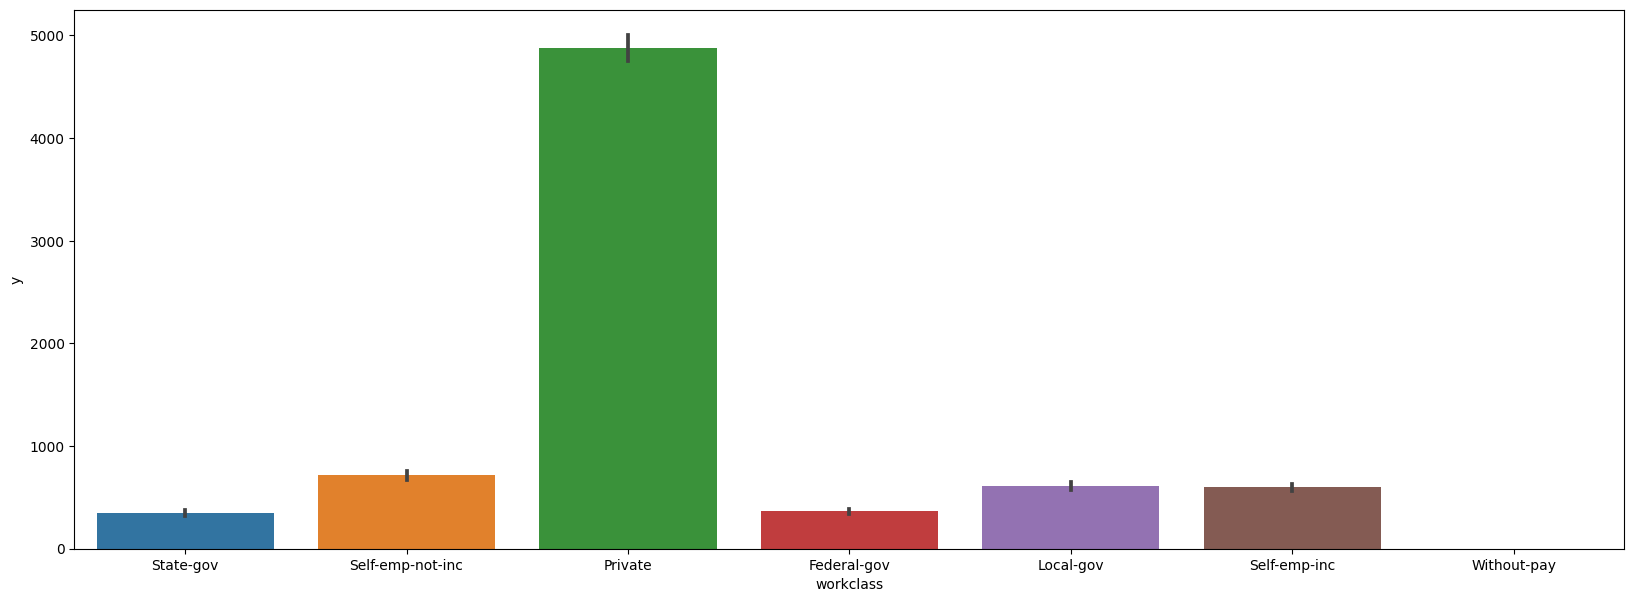

In [38]:
plt.figure(figsize=(20, 7))

sns.barplot(x='workclass', y='y', data=df, estimator=np.sum)

<Axes: xlabel='workclass', ylabel='y'>

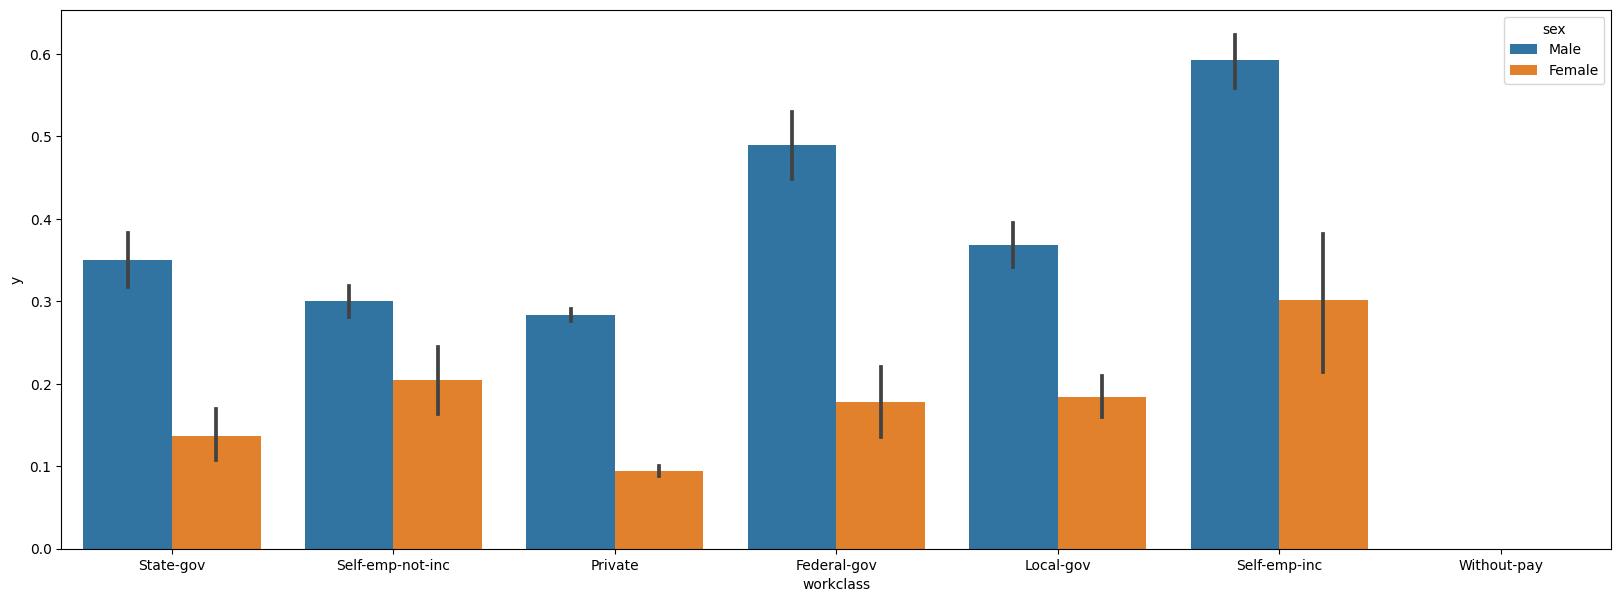

In [40]:
plt.figure(figsize=(20, 7))

sns.barplot(x='workclass', y='y', hue='sex', data=df, estimator=np.mean)

<Axes: xlabel='workclass', ylabel='age'>

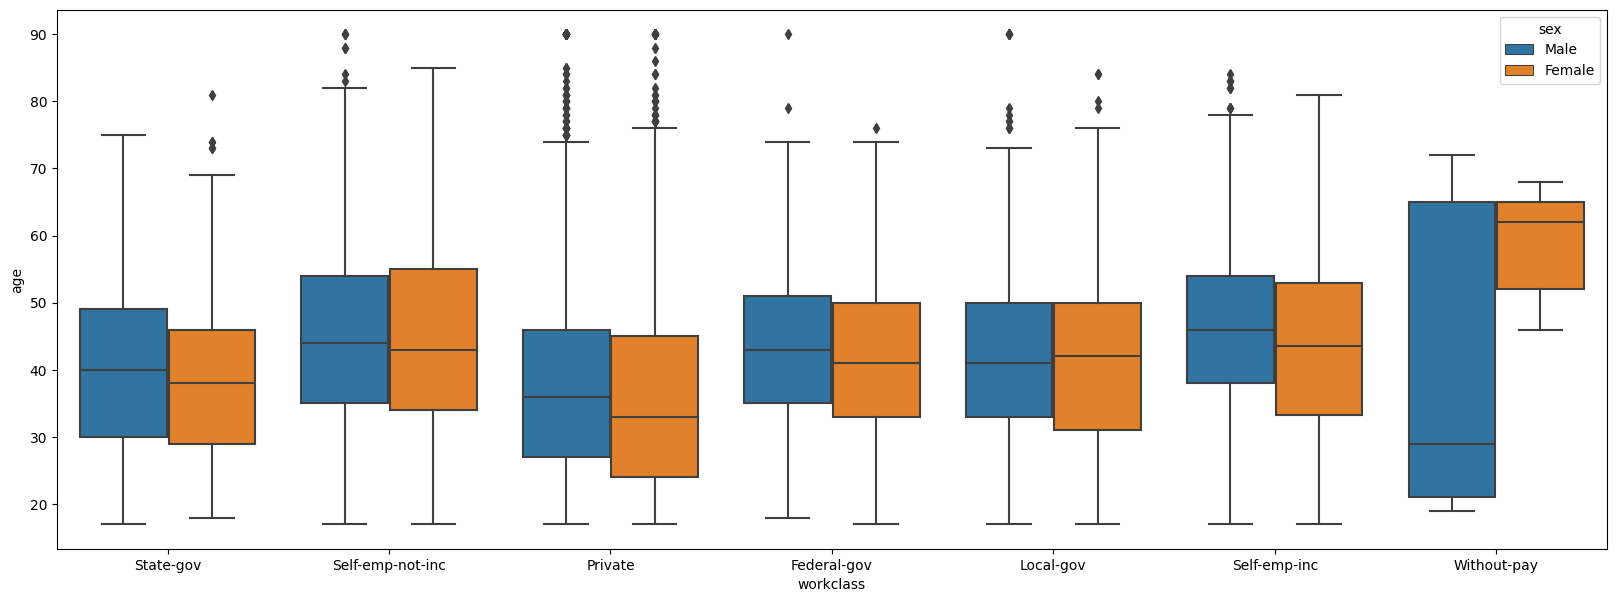

In [44]:
plt.figure(figsize=(20, 7))

sns.boxplot(x='workclass', y='age', hue='sex', data=df)

<Axes: xlabel='workclass', ylabel='age'>

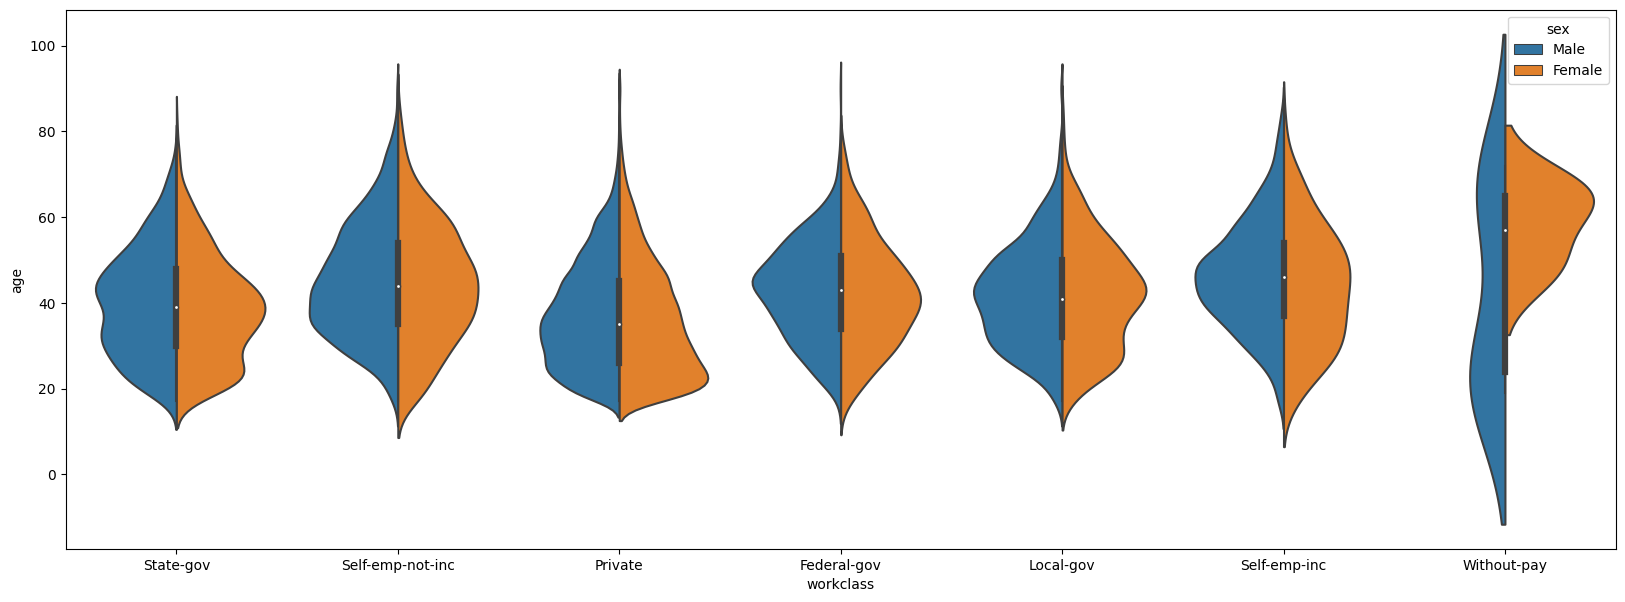

In [47]:
plt.figure(figsize=(20, 7))

sns.violinplot(x='workclass', y='age', hue='sex', data=df, split=True)